In [74]:
import joblib
import seaborn as sb
import minisom
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from collections import Counter
import pickle
from matplotlib import cm, colors
import laytr
import matplotlib.pyplot as plt
import pyranges

In [2]:
som = joblib.load("som_TR_4mers_25x25_experimental_bl_ur.som")

In [3]:
m_map = joblib.load("../soms/adotto_TRv1.1_4mers_doublestranded.map")
m_gc = joblib.load("../soms/adotto_TRv1.1_3mers_doublestranded.gc.jl")

In [7]:
counts = np.zeros(som.distance_map().shape)
gc_pct = np.zeros(som.distance_map().shape)
for i, g in zip(m_map['map'], m_gc['features']):
    counts[i[0], i[1]] += 1
    gc_pct[i[0], i[1]] += g
gc_pct /= counts

In [10]:
all_regions = pd.read_csv("/Users/english/code/adotto/regions/adotto_TRregions_v1.1.bed", sep='\t')
#all_regions.columns = ["chr", "start", "end", "ovl_flag", "up_buff", "dn_buff", "hom_span", "n_filtered", "n_annos", "n_subregions", "mu_purity", "pct_annotated", "interspersed", "patho", "codis", "gene_flag", "biotype", "annos"]
all_regions['Neuron_x'] = m_map['map'][:, 0]
all_regions['Neuron_y'] = m_map['map'][:, 1]

In [11]:
patho = all_regions[all_regions['patho'] != '.'].copy()
patho['marker'] = 'patho'
codis = all_regions[all_regions['codis'] != '.'].copy()
codis['marker'] = 'codis'
inter = all_regions[all_regions['interspersed'] == 'SINE'].sample(100).copy()
inter['marker'] = 'inter'

In [12]:
combined = pd.concat([patho, codis, inter], axis=0).sort_values('marker', ascending=False)

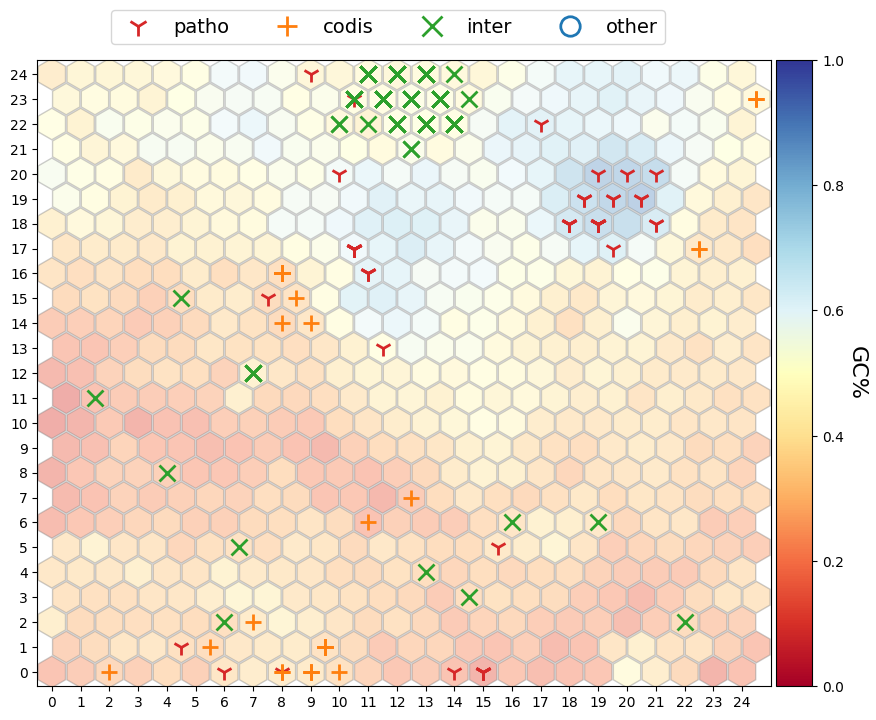

In [19]:
p = laytr.make_hex_plot(som,
                       hue=gc_pct,
                        hue_label="GC%",
                       color_map=cm.RdYlBu)
laytr.add_places(som, p, combined[["Neuron_x", "Neuron_y"]].values, combined['marker'].values)
#combined['Neuron'] = comb_winners
plt.savefig("MainSom.pdf")

In [23]:
all_pathos = pd.read_csv("/Users/english/code/adotto/pathogenic/Patho.tsv", sep='\t')

In [25]:
boxA = [[18, 21], [17, 21]]
boxB = [[10, 11], [16, 17]]
boxC = [[14, 15], [0, 0]]
boxD = [[4, 6], [0, 1]]
boxE = [[10, 10], [20, 20]]
boxF = [[9, 11], [23, 24]]
boxG = [[17, 17], [22, 22]]
boxH = [[15, 15], [5, 5]]
boxI = [[7, 7], [15, 15]]
boxJ = [[8, 8], [0, 0]]

for b in [boxA, boxB, boxC, boxD, boxE, boxF, boxG, boxH, boxI, boxJ]:
    subset = combined[combined["Neuron_x"].between(b[0][0], b[0][1]) & combined["Neuron_y"].between(b[1][0], b[1][1])]['patho']
    print(b)
    print(all_pathos[all_pathos['Locus'].isin(subset)][["Motifs 1", "Motifs 2"]])
    print()

[[18, 21], [17, 21]]
   Motifs 1              Motifs 2
0       CCG                   GCC
1       NaN                   GCC
10      CAG               GCA,GCC
13      NaN                   GCG
14   GGGGCC                GGCCCC
16      CCG                   CGG
19      NaN          CGCGGGGCGGGG
21      CGG                   GGC
24      CGG                   CGG
26      NaN                   CCG
28      GGC                   CCG
33      GCN                   GCN
34      CAG               CAG,CCG
36      CGG                   CCG
38   GGCCTG         GGCCTG,CGCCTG
39      GGC                   GGC
40      NaN                   GGC
41      CGG                   CGG
42      GCG                   GCG
43      GCN                   GCN
45      GCC                   NaN
50      GCN                   NGC
53      GCN                   NaN
55      NaN                   GCC
59      GCN                   GCN
60      GCC                   NaN
61      NaN                   CGG
64      NaN  CCTCGCTGTGCCGC

# Figure 1 B - Intersection to Reference Annotations
- SegDups
- Microsatellites
- Centromeres (only 93)
- HomPct
- Promoters
- Genes

In [35]:
bdir = "/Users/english/code/adotto/manuscript/f1_som/anno_tracks/"


In [36]:
loci = pyranges.PyRanges(all_regions.rename(columns={"chr":"Chromosome",
                                             "start":"Start",
                                             "end":"End"}))
tot_cnts = np.zeros((25, 25))
for _, (x, y) in all_regions[["Neuron_x", "Neuron_y"]].iterrows():
    tot_cnts[x, y] += 1

In [128]:
np.median(tot_cnts.ravel()), 2464 / tot_cnts.sum()

(2464.0, 0.0013805437459799507)

In [125]:
tot_cnts.ravel().mean(), tot_cnts.ravel().std() , tot_cnts.ravel().min()

(2855.6864, 1882.8848651086025, 333.0)

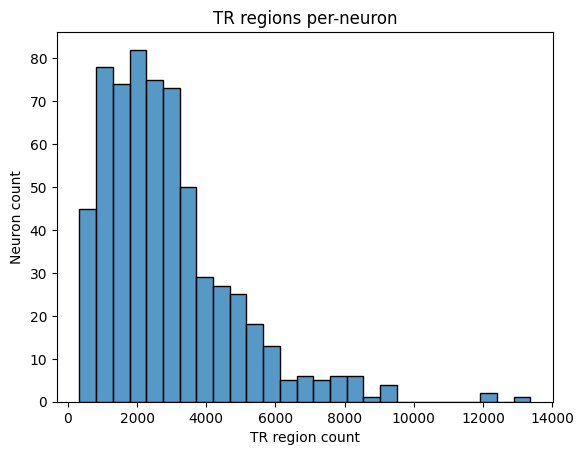

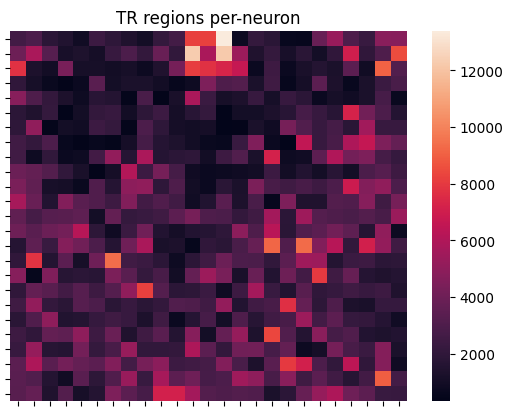

In [138]:
p = sb.histplot(data=tot_cnts.ravel())
p.set(title="TR regions per-neuron", xlabel="TR region count", ylabel="Neuron count")
plt.savefig("Sup_regperneu_hist.png")
plt.show()
p = sb.heatmap(np.flip(tot_cnts.T))
p.set(title="TR regions per-neuron", xticklabels=[], yticklabels=[])
plt.savefig("Sup_regperneu_heat.png")

Init signature: colors.Normalize(vmin=None, vmax=None, clip=False)
Docstring:     
A class which, when called, linearly normalizes data into the
``[0.0, 1.0]`` interval.
Init docstring:
Parameters
----------
vmin, vmax : float or None
    If *vmin* and/or *vmax* is not given, they are initialized from the
    minimum and maximum value, respectively, of the first input
    processed; i.e., ``__call__(A)`` calls ``autoscale_None(A)``.

clip : bool, default: False
    If ``True`` values falling outside the range ``[vmin, vmax]``,
    are mapped to 0 or 1, whichever is closer, and masked values are
    set to 1.  If ``False`` masked values remain masked.

    Clipping silently defeats the purpose of setting the over, under,
    and masked colors in a colormap, so it is likely to lead to
    surprises; therefore the default is ``clip=False``.

Notes
-----
Returns 0 if ``vmin == vmax``.
File:           ~/py/lib/python3.9/site-packages/matplotlib/colors.py
Type:           type
Subclasses:    

In [148]:
mu

2855.6864

In [157]:
mu + (2 * sd)

0.0037099065949074547

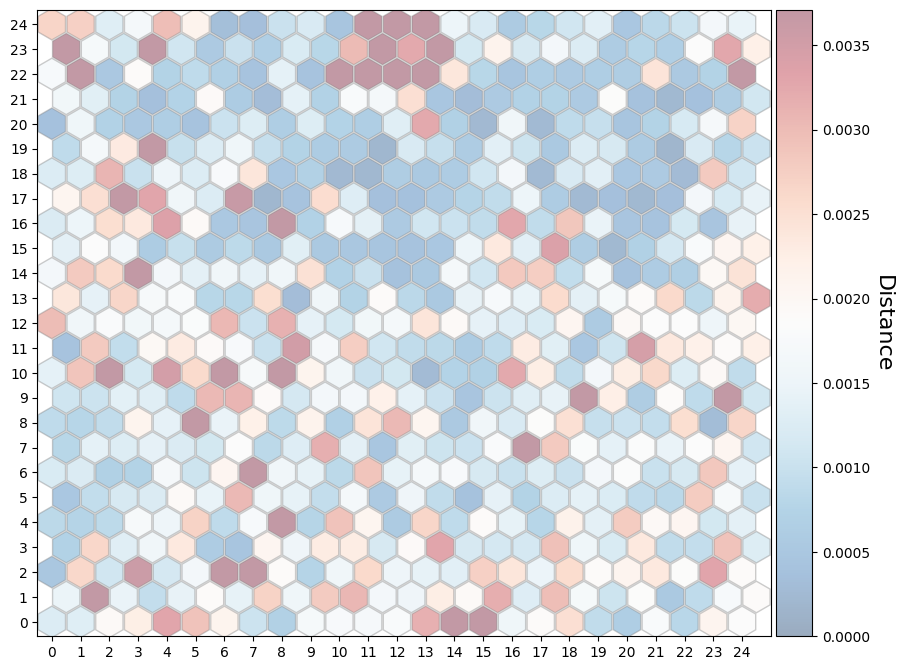

In [160]:
norm_cnts = tot_cnts / tot_cnts.sum()
mu = norm_cnts.mean()
sd = norm_cnts.std()
norm = colors.Normalize(vmin=0, vmax=mu + (2 * sd))
p = laytr.make_hex_plot(som,
                       hue=norm_cnts,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("RegionPerNeuron.pdf")

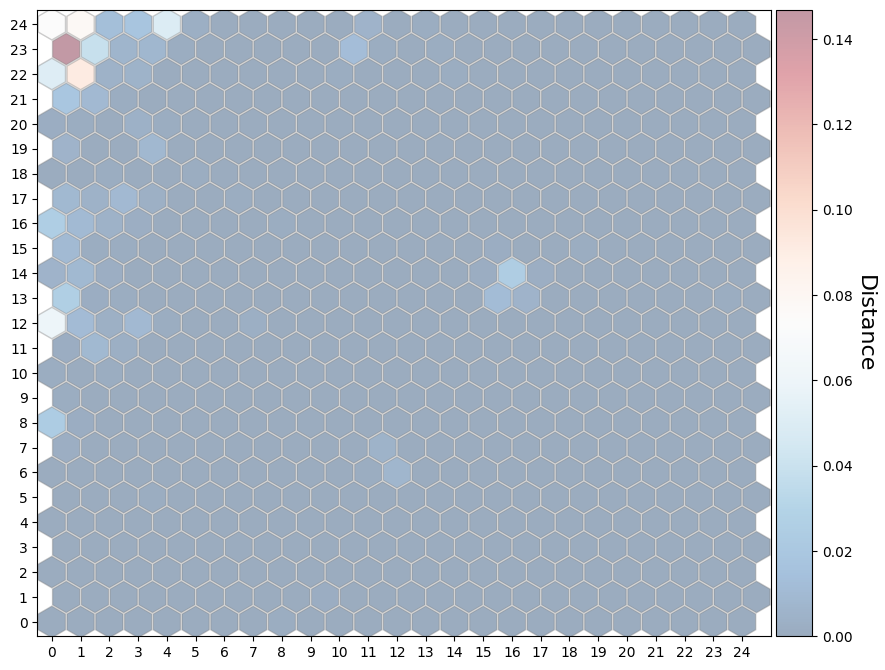

In [116]:
anno = pd.read_csv(bdir + "grch38.microsatellite.bed", sep='\t', header=None)[[0, 1, 2]].rename(columns={0:"Chromosome",
                                                                                               1:"Start",
                                                                                               2:"End"})
anno = pyranges.PyRanges(anno)

subset = loci.overlap(anno)

p_cnts = np.zeros((25, 25))
for _, (x, y) in subset.df[["Neuron_x", "Neuron_y"]].iterrows():
    p_cnts[x, y] += 1
np_cnts = p_cnts / len(subset)

norm = colors.Normalize(vmin=np_cnts.min(), vmax=np_cnts.max())
p = laytr.make_hex_plot(som,
                       hue=np_cnts,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("Microsatellite.pdf")

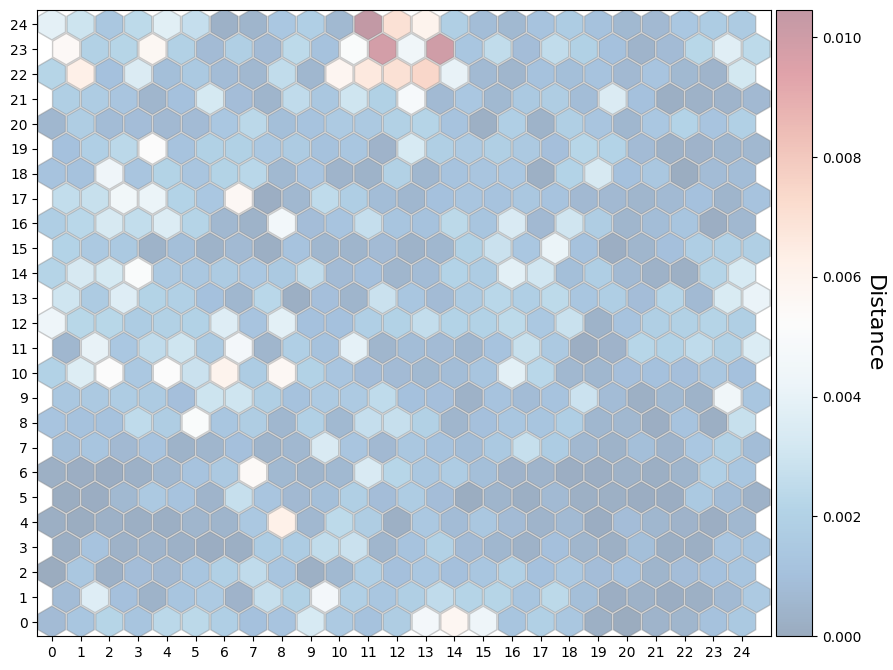

In [117]:
anno = pd.read_csv(bdir + "grch38.segdups.bed", sep='\t', header=None)[[0, 1, 2]].rename(columns={0:"Chromosome",
                                                                                               1:"Start",
                                                                                               2:"End"})
anno = pyranges.PyRanges(anno)
subset = loci.overlap(anno)

s_cnts = np.zeros((25, 25))
for _, (x, y) in subset.df[["Neuron_x", "Neuron_y"]].iterrows():
    s_cnts[x, y] += 1
ns_cnts = s_cnts / len(subset.df)

norm = colors.Normalize(vmin=ns_cnts.min(), vmax=ns_cnts.max())
p = laytr.make_hex_plot(som,
                       hue=ns_cnts,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("SegDups.pdf")

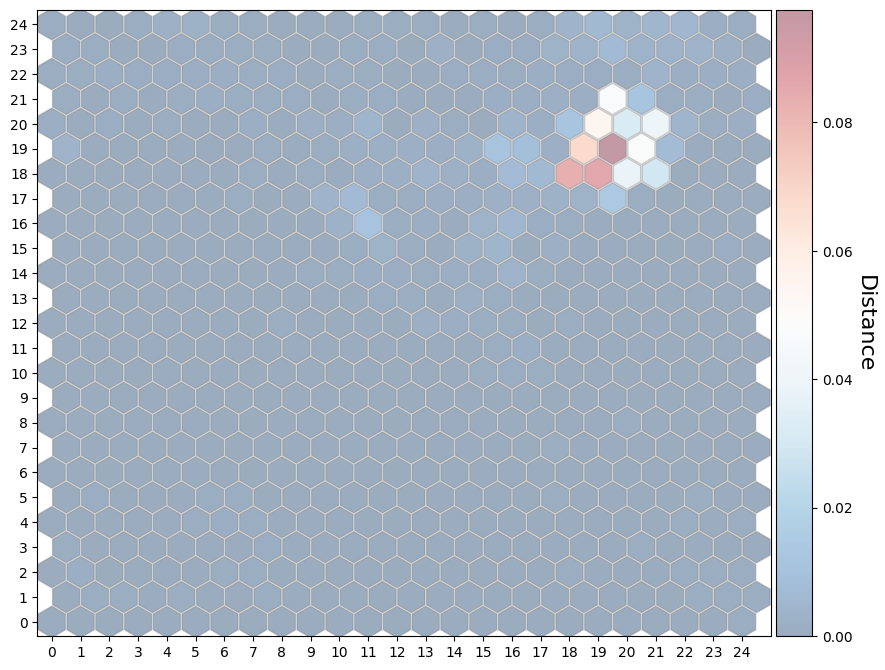

In [118]:
anno = pd.read_csv(bdir + "grch38.epdpromoters.bed", sep='\t', header=None)[[0, 1, 2]].rename(columns={0:"Chromosome",
                                                                                               1:"Start",
                                                                                               2:"End"})
anno = pyranges.PyRanges(anno)
subset = loci.overlap(anno)

s_cnts = np.zeros((25, 25))
for _, (x, y) in subset.df[["Neuron_x", "Neuron_y"]].iterrows():
    s_cnts[x, y] += 1
ns_cnts = s_cnts / len(subset)

norm = colors.Normalize(vmin=ns_cnts.min(), vmax=ns_cnts.max())
p = laytr.make_hex_plot(som,
                       hue=ns_cnts,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("Promoters.pdf")

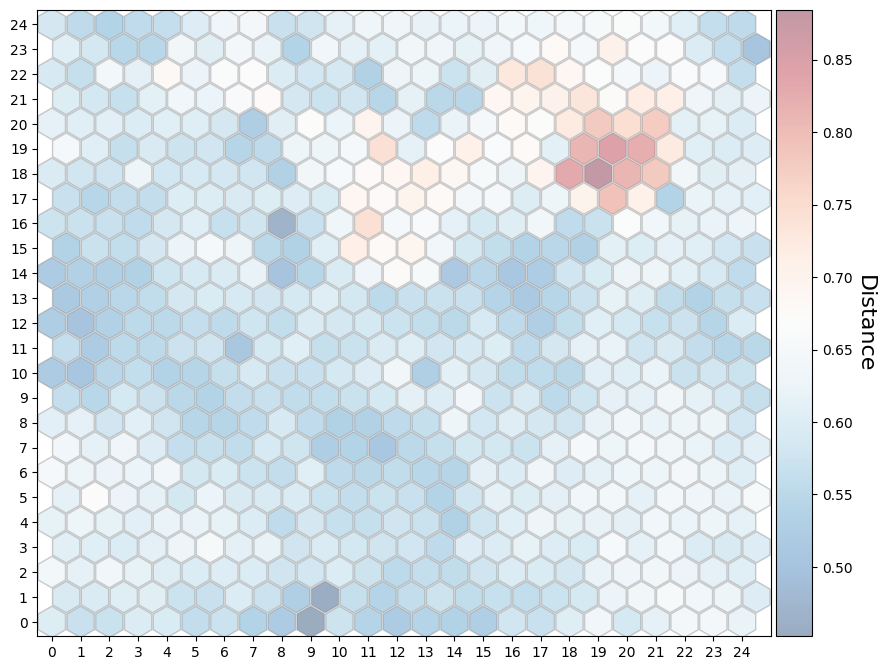

In [119]:
anno = pd.read_csv(bdir + "grch38.gencodebasicV43.bed", sep='\t', header=None)[[0, 1, 2]].rename(columns={0:"Chromosome",
                                                                                               1:"Start",
                                                                                               2:"End"})
anno = pyranges.PyRanges(anno)
subset = loci.overlap(anno)

s_cnts = np.zeros((25, 25))
for _, (x, y) in subset.df[["Neuron_x", "Neuron_y"]].iterrows():
    s_cnts[x, y] += 1
ns_cnts = s_cnts / tot_cnts

norm = colors.Normalize(vmin=ns_cnts.min(), vmax=ns_cnts.max())
p = laytr.make_hex_plot(som,
                       hue=ns_cnts,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("Genes.pdf")

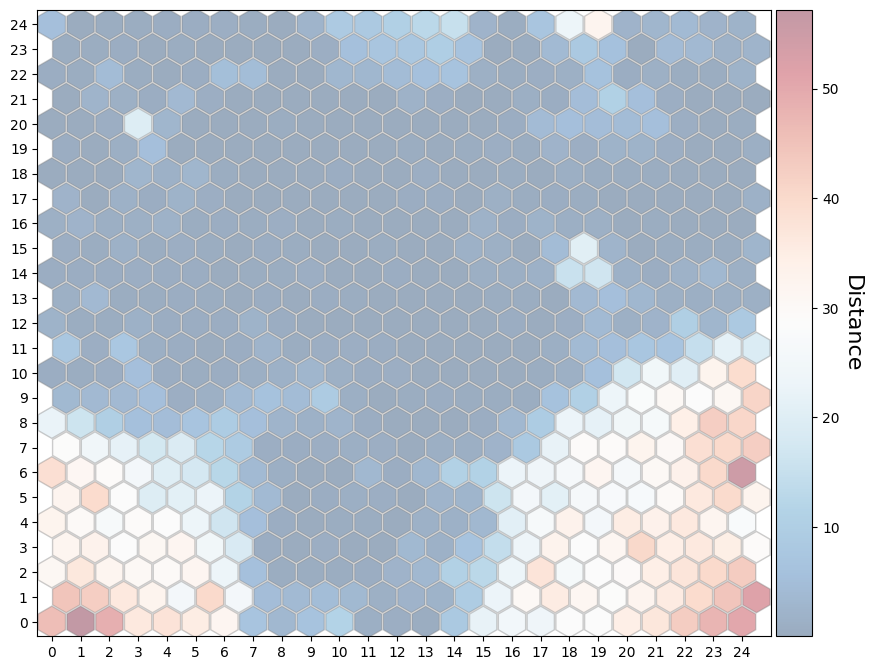

In [120]:
s_cnts = np.zeros((25, 25))
for idx, mu in all_regions.groupby(["Neuron_x", "Neuron_y"])['hom_pct'].mean().to_frame().iterrows():
    s_cnts[idx[0], idx[1]] = mu
ns_cnts = s_cnts / 100

norm = colors.Normalize(vmin=s_cnts.min(), vmax=s_cnts.max())
p = laytr.make_hex_plot(som,
                       hue=s_cnts,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("Homopolymer.pdf")

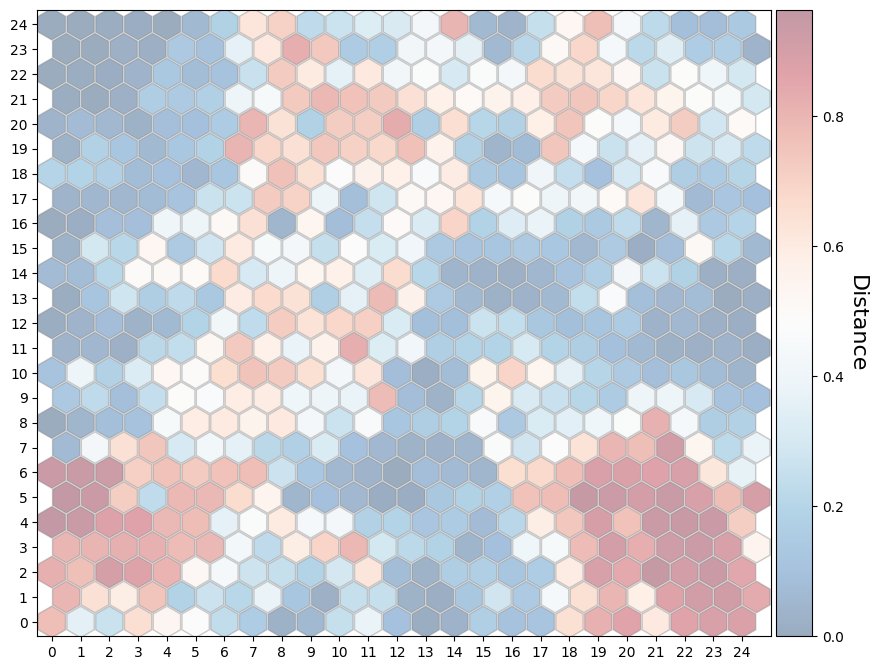

In [121]:
anno = pd.read_csv(bdir + "repeat_specs_GRCh38_without_mismatches.sorted.trimmed.at_least_9bp.bed.gz", 
                   sep='\t', header=None)[[0, 1, 2]].rename(columns={0:"Chromosome",
                                                                     1:"Start",
                                                                     2:"End"})
anno = pyranges.PyRanges(anno)
subset = loci.overlap(anno)

s_cnts = np.zeros((25, 25))
for _, (x, y) in subset.df[["Neuron_x", "Neuron_y"]].iterrows():
    s_cnts[x, y] += 1
ns_cnts = s_cnts / tot_cnts

rev = 1 - ns_cnts
norm = colors.Normalize(vmin=rev.min(), vmax=rev.max())
p = laytr.make_hex_plot(som,
                       hue=rev,
                       color_map=cm.RdBu_r,
                       color_norm=norm)
plt.savefig("NovelRelativeToBroad.pdf")